# Assignment – Convolutional Neural Networks

# Description
In our previous sessions we have spent time to understand how to build a CNN ground up using
Tensorflow as well as pretrained models. In this assignment you will do both the above on a given
dataset and evaluate the performance of a model based on that


# Dataset
CIFAR 10 dataset from Keras. Use the below code to load the data

from tf.keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()

CIFAR10 is commonly the first dataset to experience. This dataset contains 60000 32x32 color images uniformly distributed to 10 classes. Below are some samples of CIFAR10 dataset depicting 10 classes.

Before applied to training or test procedure, Data Transformation are usually used to pre-process data to some standard with the purpose to optimally increase the precision of both processes. In the notebook, the author only transformed image data by a few common transforming technique e.g. Random Crop, Horizontal Flipping, and Normalization by the mean and standard deviation of CIFAR10 dataset.

# Task
1. Custom Trained CNN

    a. Train a CNN model using Keras Tensorflow ground up
    
    b. Tune the models hyperparameters
        
        i. #Layers
        ii. #Units
        iii. Epochs
        iv. Learning Rate
        v. Optimizers etc.
        
    c. Track the following metrics on Train and Validation sets
            
        i. Loss
        ii. Accuracy
        iii. AUC
        iv. Time taken to tune
  
2. Using a Pretrained Model

    a. Load a pretrained model like VGG16 or Resnet50

    b. Finetune the last 2/3 layers using a small part of the CIFAR10 dataset (20 percentage or so)

    c. Track the following metrics on Train and Validation sets

        i. Loss
        ii. Accuracy
        iii. AUC
        iv. Time taken to tune
        
3. Compare the results

    a. Now compare the results and populate the following table

        Approach            Accuracy     AUC          Time Taken

Custom CNN Model

Pretrained Model

Document your understanding from the above results


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
import glob


from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


import numpy as np
import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.preprocessing import image

# Loading the Data:

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical

# Splitting the data into x_train,y_train,x_test,y_test:

In [3]:
(x_train,y_train),(x_test,y_test)=load_data()

In [4]:
load_data

<function keras.src.datasets.cifar10.load_data()>

In [5]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

    0: airplane
    1: automobile
    2: bird
    3: cat
    4: deer
    5: dog
    6: frog
    7: horse
    8: ship
    9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.

The example below loads the CIFAR-10 dataset using the Keras API and creates a plot of the first nine images in the training dataset.

In [6]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
uint8
uint8


We can see that there are 50,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 32×32 pixels and color, with three channels.

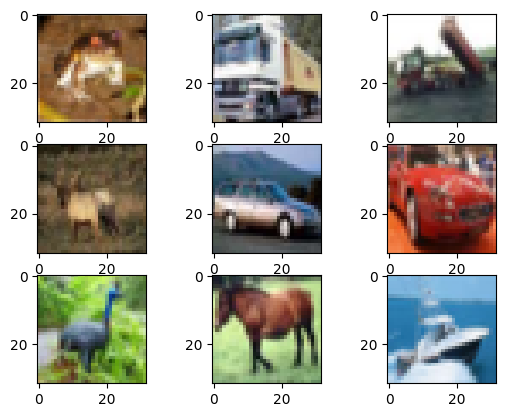

In [8]:
# plot first few images
for i in range(9):
 # define subplot
  plt.subplot(330 + 1 + i)
 # plot raw pixel data
  plt.imshow(x_train[i])
# show the figure
plt.show()

# Data Preparation:

# OneHotEncoading the y data:

We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the to_categorical() utility function.

In [9]:
ohe_y_train=to_categorical(y_train)
ohe_y_test=to_categorical(y_test)
print(ohe_y_train.shape)
print(ohe_y_test.shape)

(50000, 10)
(10000, 10)


# Prepare Pixel Data
We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.

In [10]:
x_train=x_train.astype('float')
x_test=x_test.astype('float')
print('x_train.dtype  -  ',x_train.dtype)
print('x_test.dtype   -   ',x_test.dtype)

x_train.dtype  -   float64
x_test.dtype   -    float64


# Normalise the Data to 0-1:
    A good starting point is to normalize the pixel values, to 0-1 e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [11]:
# convert from integers to floats
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

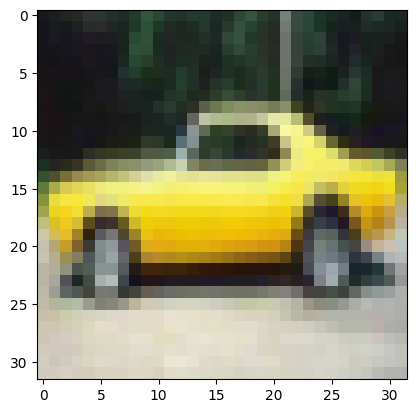

In [12]:
plt.imshow(x_train[823].astype(int))
plt.show()

# Model Building:

1. Custom Trained CNN

        a. Train a CNN model using Keras Tensorflow ground up        
        b. Tune the models hyperparameters        
                i. #Layers
                ii. #Units
                iii. Epochs
                iv. Learning Rate
                v. Optimizers etc.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Dropout, BatchNormalization, Flatten

Epoch 1/50
50/50 [==============================] - 16s 164ms/step - loss: 44.7726 - accuracy: 0.1148 - val_loss: 19.7009 - val_accuracy: 0.1238
Epoch 2/50
50/50 [==============================] - 5s 105ms/step - loss: 10.5883 - accuracy: 0.1323 - val_loss: 5.3958 - val_accuracy: 0.1437
Epoch 3/50
50/50 [==============================] - 5s 108ms/step - loss: 4.2074 - accuracy: 0.1494 - val_loss: 3.3979 - val_accuracy: 0.1541
Epoch 4/50
50/50 [==============================] - 6s 117ms/step - loss: 3.1257 - accuracy: 0.1528 - val_loss: 2.8666 - val_accuracy: 0.1557
Epoch 5/50
50/50 [==============================] - 7s 138ms/step - loss: 2.7624 - accuracy: 0.1541 - val_loss: 2.6388 - val_accuracy: 0.1534
Epoch 6/50
50/50 [==============================] - 8s 152ms/step - loss: 2.5862 - accuracy: 0.1545 - val_loss: 2.5210 - val_accuracy: 0.1564
Epoch 7/50
50/50 [==============================] - 7s 138ms/step - loss: 2.4830 - accuracy: 0.1582 - val_loss: 2.4474 - val_accuracy: 0.1584
Ep

Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


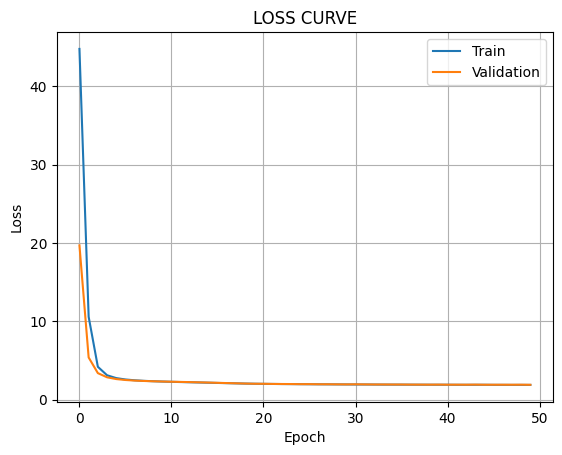

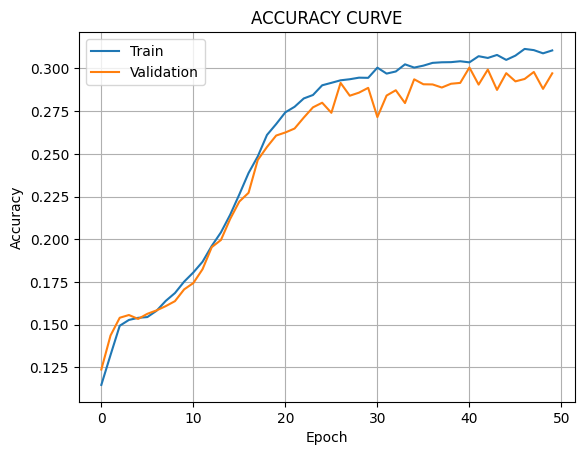

313/313 [==============================] - 2s 6ms/step
auc_roc1000_50   0.7691081499999999


In [14]:
model1000 = Sequential()
model1000.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model1000.add(Activation("relu"))
model1000.add(MaxPool2D(pool_size=(2,2)))

model1000.add(Flatten())
model1000.add(Dense(10, activation="softmax"))

model1000.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model1000.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=1000,
          validation_data=(x_test, ohe_y_test),
          epochs=50)
model1000.summary()

train_loss = model1000.history.history['loss']
val_loss = model1000.history.history['val_loss']
train_accuracy = model1000.history.history['accuracy']
validation_accuracy = model1000.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc1000_50 = roc_auc_score(labels, model1000.predict(x_test), multi_class='ovr')
print('auc_roc1000_50  ',auc_roc1000_50)

Epoch 1/75
100/100 [==============================] - 9s 70ms/step - loss: 46.4859 - accuracy: 0.1478 - val_loss: 8.1169 - val_accuracy: 0.1655
Epoch 2/75
100/100 [==============================] - 6s 59ms/step - loss: 4.6713 - accuracy: 0.1521 - val_loss: 3.0864 - val_accuracy: 0.1491
Epoch 3/75
100/100 [==============================] - 8s 84ms/step - loss: 2.8582 - accuracy: 0.1410 - val_loss: 2.5807 - val_accuracy: 0.1355
Epoch 4/75
100/100 [==============================] - 9s 89ms/step - loss: 2.5454 - accuracy: 0.1334 - val_loss: 2.4357 - val_accuracy: 0.1354
Epoch 5/75
100/100 [==============================] - 9s 87ms/step - loss: 2.4277 - accuracy: 0.1370 - val_loss: 2.3738 - val_accuracy: 0.1409
Epoch 6/75
100/100 [==============================] - 9s 91ms/step - loss: 2.3683 - accuracy: 0.1422 - val_loss: 2.3378 - val_accuracy: 0.1450
Epoch 7/75
100/100 [==============================] - 9s 91ms/step - loss: 2.3321 - accuracy: 0.1478 - val_loss: 2.3107 - val_accuracy: 0.153

Epoch 58/75
100/100 [==============================] - 7s 71ms/step - loss: 1.8693 - accuracy: 0.3192 - val_loss: 1.8887 - val_accuracy: 0.2943
Epoch 59/75
100/100 [==============================] - 7s 71ms/step - loss: 1.8696 - accuracy: 0.3173 - val_loss: 1.8757 - val_accuracy: 0.3110
Epoch 60/75
100/100 [==============================] - 7s 72ms/step - loss: 1.8760 - accuracy: 0.3130 - val_loss: 1.8885 - val_accuracy: 0.3028
Epoch 61/75
100/100 [==============================] - 7s 71ms/step - loss: 1.8730 - accuracy: 0.3148 - val_loss: 1.9083 - val_accuracy: 0.3077
Epoch 62/75
100/100 [==============================] - 7s 71ms/step - loss: 1.8683 - accuracy: 0.3155 - val_loss: 1.8735 - val_accuracy: 0.3100
Epoch 63/75
100/100 [==============================] - 7s 70ms/step - loss: 1.8636 - accuracy: 0.3187 - val_loss: 1.8787 - val_accuracy: 0.3145
Epoch 64/75
100/100 [==============================] - 7s 73ms/step - loss: 1.8666 - accuracy: 0.3160 - val_loss: 1.8693 - val_accuracy:

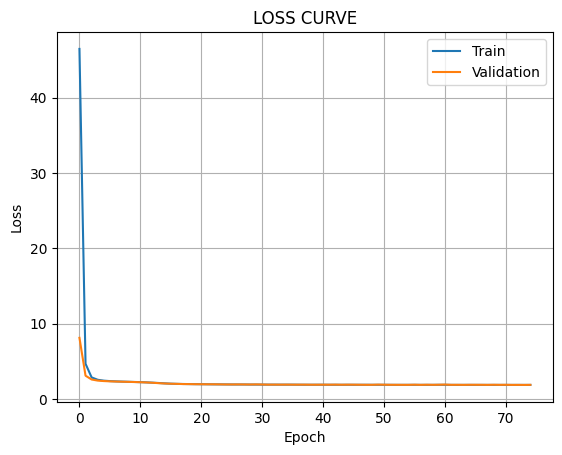

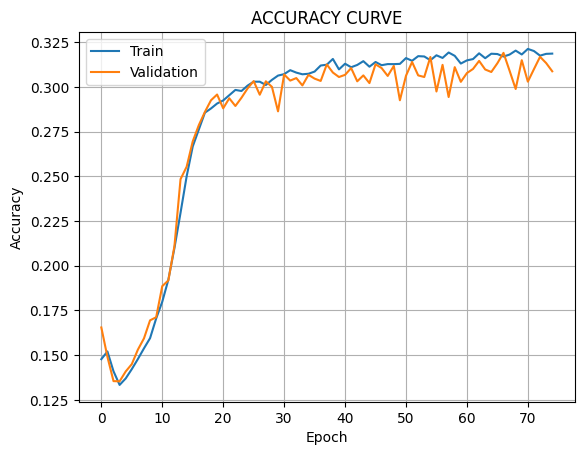

313/313 [==============================] - 2s 6ms/step
auc_roc500_75   0.7795984888888888


In [15]:
model500_75 = Sequential()
model500_75.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_75.add(Activation("relu"))
model500_75.add(MaxPool2D(pool_size=(2,2)))
model500_75.add(Dropout(.05))
model500_75.add(Flatten())
model500_75.add(Dense(10, activation="softmax"))

model500_75.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model500_75.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=500,
          validation_data=(x_test, ohe_y_test),
          epochs=75)
model500_75.summary()

train_loss = model500_75.history.history['loss']
val_loss = model500_75.history.history['val_loss']
train_accuracy = model500_75.history.history['accuracy']
validation_accuracy = model500_75.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc500_75 = roc_auc_score(labels, model500_75.predict(x_test), multi_class='ovr')

print('auc_roc500_75  ',auc_roc500_75)

Epoch 1/70
100/100 [==============================] - 16s 124ms/step - loss: 2.7882 - accuracy: 0.0973 - val_loss: 2.3071 - val_accuracy: 0.0993
Epoch 2/70
100/100 [==============================] - 12s 115ms/step - loss: 2.3061 - accuracy: 0.0986 - val_loss: 2.3051 - val_accuracy: 0.1003
Epoch 3/70
100/100 [==============================] - 15s 152ms/step - loss: 2.3041 - accuracy: 0.0995 - val_loss: 2.3040 - val_accuracy: 0.1001
Epoch 4/70
100/100 [==============================] - 15s 150ms/step - loss: 2.3033 - accuracy: 0.0986 - val_loss: 2.3035 - val_accuracy: 0.0999
Epoch 5/70
100/100 [==============================] - 15s 149ms/step - loss: 2.3028 - accuracy: 0.1018 - val_loss: 2.3030 - val_accuracy: 0.1011
Epoch 6/70
100/100 [==============================] - 15s 148ms/step - loss: 2.3024 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1007
Epoch 7/70
100/100 [==============================] - 15s 152ms/step - loss: 2.3021 - accuracy: 0.1013 - val_loss: 2.3023 - val_ac

100/100 [==============================] - 17s 168ms/step - loss: 1.5880 - accuracy: 0.4275 - val_loss: 1.6008 - val_accuracy: 0.4238
Epoch 58/70
100/100 [==============================] - 16s 158ms/step - loss: 1.5857 - accuracy: 0.4284 - val_loss: 1.6133 - val_accuracy: 0.4247
Epoch 59/70
100/100 [==============================] - 20s 196ms/step - loss: 1.5808 - accuracy: 0.4291 - val_loss: 1.5953 - val_accuracy: 0.4274
Epoch 60/70
100/100 [==============================] - 16s 155ms/step - loss: 1.5789 - accuracy: 0.4304 - val_loss: 1.5925 - val_accuracy: 0.4303
Epoch 61/70
100/100 [==============================] - 15s 150ms/step - loss: 1.5791 - accuracy: 0.4300 - val_loss: 1.6099 - val_accuracy: 0.4250
Epoch 62/70
100/100 [==============================] - 15s 150ms/step - loss: 1.5746 - accuracy: 0.4314 - val_loss: 1.5867 - val_accuracy: 0.4281
Epoch 63/70
100/100 [==============================] - 15s 154ms/step - loss: 1.5709 - accuracy: 0.4342 - val_loss: 1.5943 - val_accurac

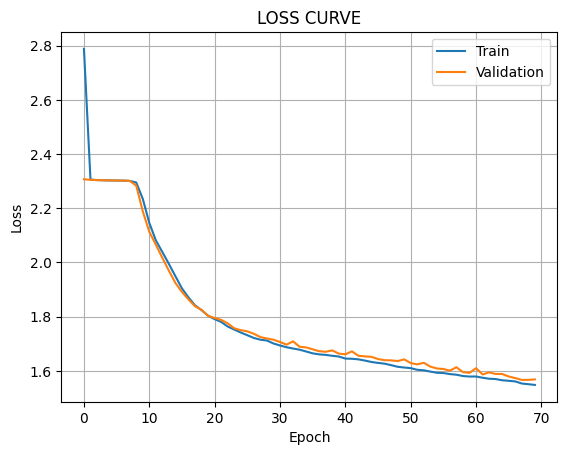

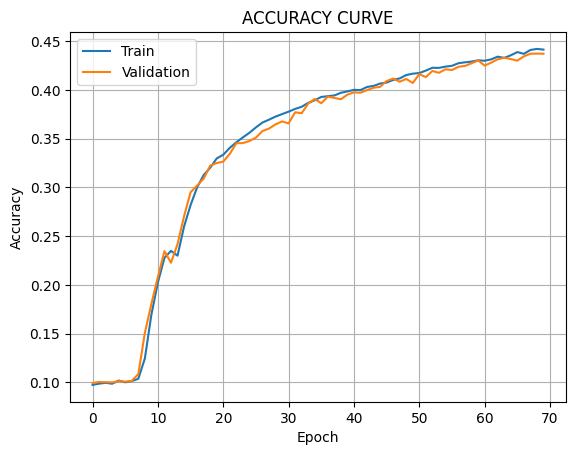

313/313 [==============================] - 3s 10ms/step
auc_roc500_70   0.8503261777777776


In [17]:
model500_70 = Sequential()
model500_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_70.add(Activation("relu"))
model500_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_70.add(Activation("relu"))
model500_70.add(MaxPool2D(pool_size=(2,2)))
model500_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_70.add(Activation("relu"))
model500_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_70.add(Activation("relu"))
model500_70.add(MaxPool2D(pool_size=(2,2)))



model500_70.add(Flatten())
model500_70.add(Dense(10, activation="softmax"))

model500_70.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model500_70.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=500,
          validation_data=(x_test, ohe_y_test),
          epochs=70)
model500_70.summary()

train_loss = model500_70.history.history['loss']
val_loss = model500_70.history.history['val_loss']
train_accuracy = model500_70.history.history['accuracy']
validation_accuracy = model500_70.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc500_70 = roc_auc_score(labels, model500_70.predict(x_test), multi_class='ovr')
print('auc_roc500_70  ',auc_roc500_70)

Epoch 1/50
100/100 [==============================] - 21s 179ms/step - loss: 3.2314 - accuracy: 0.1120 - val_loss: 2.3645 - val_accuracy: 0.1226
Epoch 2/50
100/100 [==============================] - 17s 171ms/step - loss: 2.3289 - accuracy: 0.1258 - val_loss: 2.3148 - val_accuracy: 0.1268
Epoch 3/50
100/100 [==============================] - 19s 193ms/step - loss: 2.3013 - accuracy: 0.1286 - val_loss: 2.2998 - val_accuracy: 0.1307
Epoch 4/50
100/100 [==============================] - 20s 197ms/step - loss: 2.2899 - accuracy: 0.1338 - val_loss: 2.2903 - val_accuracy: 0.1356
Epoch 5/50
100/100 [==============================] - 19s 194ms/step - loss: 2.2801 - accuracy: 0.1415 - val_loss: 2.2804 - val_accuracy: 0.1406
Epoch 6/50
100/100 [==============================] - 19s 192ms/step - loss: 2.2694 - accuracy: 0.1484 - val_loss: 2.2699 - val_accuracy: 0.1470
Epoch 7/50
100/100 [==============================] - 18s 182ms/step - loss: 2.2582 - accuracy: 0.1562 - val_loss: 2.2582 - val_ac

 conv2d_8 (Conv2D)           (500, 12, 12, 3)          84        
                                                                 
 activation_8 (Activation)   (500, 12, 12, 3)          0         
                                                                 
 conv2d_9 (Conv2D)           (500, 10, 10, 3)          84        
                                                                 
 activation_9 (Activation)   (500, 10, 10, 3)          0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (500, 5, 5, 3)            0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (500, 75)                 0         
                                                                 
 dense_3 (Dense)             (500, 10)                 760       
                                                                 
Total para

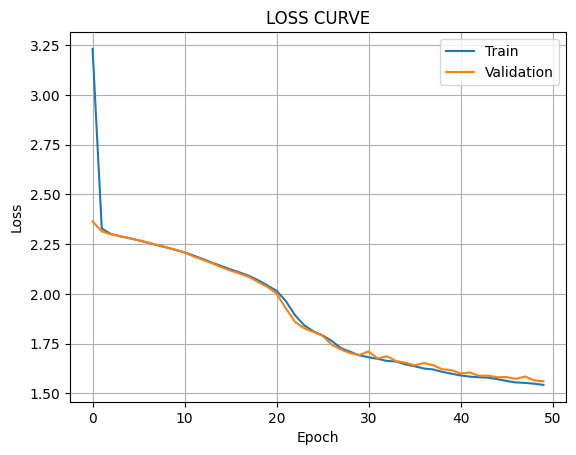

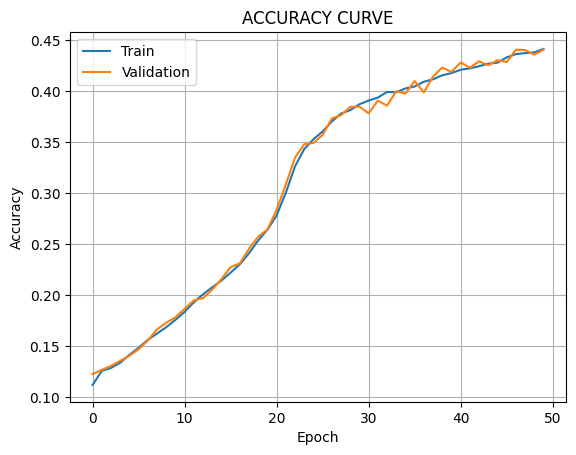

313/313 [==============================] - 4s 11ms/step
auc_roc500_50 0.8506387277777778


In [18]:
model500_50 = Sequential()
model500_50.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_50.add(Activation("relu"))
model500_50.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_50.add(Activation("relu"))
model500_50.add(MaxPool2D(pool_size=(2,2)))
model500_50.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_50.add(Activation("relu"))
model500_50.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model500_50.add(Activation("relu"))
model500_50.add(MaxPool2D(pool_size=(2,2)))



model500_50.add(Flatten())
model500_50.add(Dense(10, activation="softmax"))

model500_50.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model500_50.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=500,
          validation_data=(x_test, ohe_y_test),
          epochs=50)
model500_50.summary()

train_loss = model500_50.history.history['loss']
val_loss = model500_50.history.history['val_loss']
train_accuracy = model500_50.history.history['accuracy']
validation_accuracy = model500_50.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc500_50 = roc_auc_score(labels, model500_50.predict(x_test), multi_class='ovr')
print('auc_roc500_50',auc_roc500_50)

Epoch 1/70
200/200 [==============================] - 19s 76ms/step - loss: 4.4812 - accuracy: 0.1229 - val_loss: 2.3721 - val_accuracy: 0.1305
Epoch 2/70
200/200 [==============================] - 18s 89ms/step - loss: 2.3159 - accuracy: 0.1364 - val_loss: 2.2591 - val_accuracy: 0.1632
Epoch 3/70
200/200 [==============================] - 17s 85ms/step - loss: 2.2003 - accuracy: 0.1844 - val_loss: 2.1388 - val_accuracy: 0.2036
Epoch 4/70
200/200 [==============================] - 18s 91ms/step - loss: 2.1048 - accuracy: 0.2226 - val_loss: 2.0745 - val_accuracy: 0.2352
Epoch 5/70
200/200 [==============================] - 20s 99ms/step - loss: 2.0487 - accuracy: 0.2465 - val_loss: 2.0346 - val_accuracy: 0.2502
Epoch 6/70
200/200 [==============================] - 19s 94ms/step - loss: 2.0142 - accuracy: 0.2579 - val_loss: 2.0056 - val_accuracy: 0.2607
Epoch 7/70
200/200 [==============================] - 18s 91ms/step - loss: 1.9899 - accuracy: 0.2646 - val_loss: 1.9805 - val_accuracy:

200/200 [==============================] - 17s 87ms/step - loss: 1.5123 - accuracy: 0.4576 - val_loss: 1.5177 - val_accuracy: 0.4501
Epoch 58/70
200/200 [==============================] - 18s 92ms/step - loss: 1.5080 - accuracy: 0.4588 - val_loss: 1.5046 - val_accuracy: 0.4552
Epoch 59/70
200/200 [==============================] - 17s 85ms/step - loss: 1.5059 - accuracy: 0.4586 - val_loss: 1.5074 - val_accuracy: 0.4587
Epoch 60/70
200/200 [==============================] - 17s 85ms/step - loss: 1.5027 - accuracy: 0.4605 - val_loss: 1.5094 - val_accuracy: 0.4515
Epoch 61/70
200/200 [==============================] - 17s 87ms/step - loss: 1.5028 - accuracy: 0.4607 - val_loss: 1.5189 - val_accuracy: 0.4551
Epoch 62/70
200/200 [==============================] - 17s 84ms/step - loss: 1.4975 - accuracy: 0.4615 - val_loss: 1.5040 - val_accuracy: 0.4572
Epoch 63/70
200/200 [==============================] - 17s 83ms/step - loss: 1.4976 - accuracy: 0.4633 - val_loss: 1.4989 - val_accuracy: 0.45

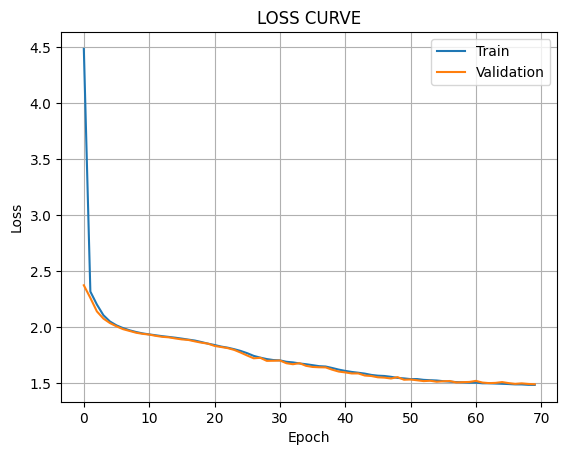

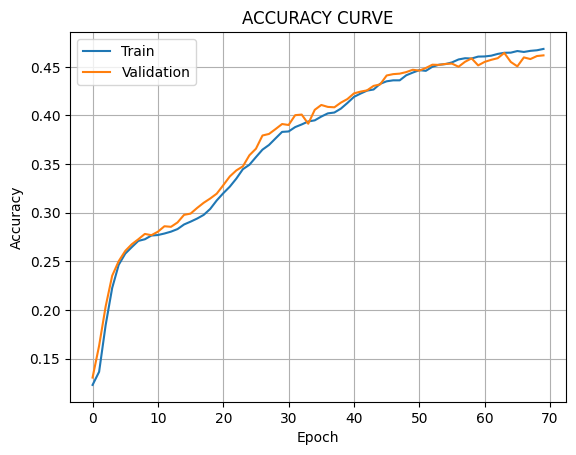

313/313 [==============================] - 4s 10ms/step
auc_roc250_70 0.8641369444444444


In [20]:
model250_70 = Sequential()
model250_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model250_70.add(Activation("relu"))
model250_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model250_70.add(Activation("relu"))
model250_70.add(MaxPool2D(pool_size=(2,2)))
model250_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model250_70.add(Activation("relu"))
model250_70.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model250_70.add(Activation("relu"))
model250_70.add(MaxPool2D(pool_size=(2,2)))



model250_70.add(Flatten())
model250_70.add(Dense(10, activation="softmax"))

model250_70.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model250_70.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=250,
          validation_data=(x_test, ohe_y_test),
          epochs=70)
model250_70.summary()

train_loss = model250_70.history.history['loss']
val_loss = model250_70.history.history['val_loss']
train_accuracy = model250_70.history.history['accuracy']
validation_accuracy = model250_70.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc250_70 = roc_auc_score(labels, model250_70.predict(x_test), multi_class='ovr')
print('auc_roc250_70',auc_roc250_70)

Epoch 1/100
223/223 [==============================] - 25s 91ms/step - loss: 2.2866 - accuracy: 0.1420 - val_loss: 2.1960 - val_accuracy: 0.1825
Epoch 2/100
223/223 [==============================] - 18s 82ms/step - loss: 2.1158 - accuracy: 0.2265 - val_loss: 2.0512 - val_accuracy: 0.2566
Epoch 3/100
223/223 [==============================] - 18s 80ms/step - loss: 1.9992 - accuracy: 0.2729 - val_loss: 1.9303 - val_accuracy: 0.2801
Epoch 4/100
223/223 [==============================] - 18s 80ms/step - loss: 1.8782 - accuracy: 0.2988 - val_loss: 1.8353 - val_accuracy: 0.3174
Epoch 5/100
223/223 [==============================] - 17s 77ms/step - loss: 1.8140 - accuracy: 0.3297 - val_loss: 1.7916 - val_accuracy: 0.3390
Epoch 6/100
223/223 [==============================] - 17s 75ms/step - loss: 1.7727 - accuracy: 0.3535 - val_loss: 1.7497 - val_accuracy: 0.3663
Epoch 7/100
223/223 [==============================] - 20s 88ms/step - loss: 1.7429 - accuracy: 0.3657 - val_loss: 1.7333 - val_ac

223/223 [==============================] - 20s 89ms/step - loss: 1.4940 - accuracy: 0.4638 - val_loss: 1.5103 - val_accuracy: 0.4590
Epoch 58/100
223/223 [==============================] - 21s 95ms/step - loss: 1.4946 - accuracy: 0.4651 - val_loss: 1.4913 - val_accuracy: 0.4673
Epoch 59/100
223/223 [==============================] - 20s 91ms/step - loss: 1.4924 - accuracy: 0.4653 - val_loss: 1.4993 - val_accuracy: 0.4595
Epoch 60/100
223/223 [==============================] - 20s 90ms/step - loss: 1.4855 - accuracy: 0.4685 - val_loss: 1.5021 - val_accuracy: 0.4558
Epoch 61/100
223/223 [==============================] - 20s 90ms/step - loss: 1.4853 - accuracy: 0.4693 - val_loss: 1.5236 - val_accuracy: 0.4586
Epoch 62/100
223/223 [==============================] - 20s 91ms/step - loss: 1.4853 - accuracy: 0.4683 - val_loss: 1.4877 - val_accuracy: 0.4649
Epoch 63/100
223/223 [==============================] - 21s 94ms/step - loss: 1.4827 - accuracy: 0.4723 - val_loss: 1.4900 - val_accuracy

 flatten_5 (Flatten)         (None, 75)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                760       
                                                                 
Total params: 1096 (4.28 KB)
Trainable params: 1096 (4.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


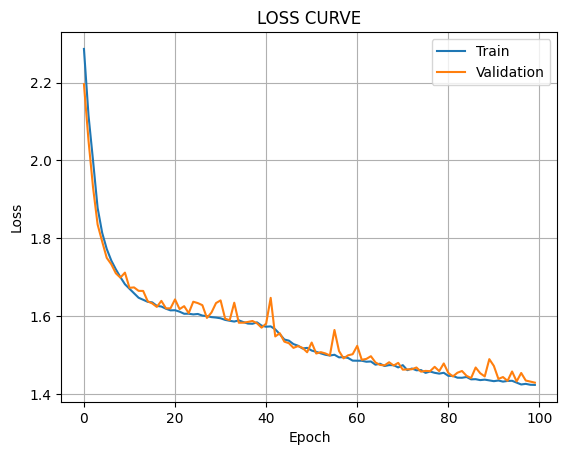

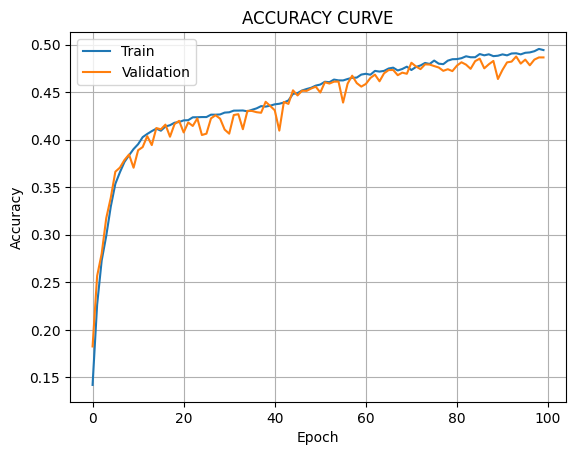

313/313 [==============================] - 4s 10ms/step
auc_roc225_100  0.87793785


In [21]:
model225_100 = Sequential()
model225_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100.add(Activation("relu"))
model225_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100.add(Activation("relu"))
model225_100.add(MaxPool2D(pool_size=(2,2)))
model225_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100.add(Activation("relu"))
model225_100.add(Dropout(0.1))
model225_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100.add(Activation("relu"))
model225_100.add(MaxPool2D(pool_size=(2,2)))



model225_100.add(Flatten())
model225_100.add(Dense(10, activation="softmax"))

model225_100.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model225_100.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=225,
          validation_data=(x_test, ohe_y_test),
          epochs=100)
model225_100.summary()

train_loss = model225_100.history.history['loss']
val_loss = model225_100.history.history['val_loss']
train_accuracy = model225_100.history.history['accuracy']
validation_accuracy = model225_100.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc225_100 = roc_auc_score(labels, model225_100.predict(x_test), multi_class='ovr')
print('auc_roc225_100 ',auc_roc225_100)

Epoch 1/100
223/223 [==============================] - 54s 75ms/step - loss: 3.4824 - accuracy: 0.1001 - val_loss: 2.5486 - val_accuracy: 0.1105
Epoch 2/100
223/223 [==============================] - 18s 80ms/step - loss: 2.4597 - accuracy: 0.1074 - val_loss: 2.3602 - val_accuracy: 0.1116
Epoch 3/100
223/223 [==============================] - 19s 83ms/step - loss: 2.3521 - accuracy: 0.1109 - val_loss: 2.3262 - val_accuracy: 0.1154
Epoch 4/100
223/223 [==============================] - 18s 81ms/step - loss: 2.3251 - accuracy: 0.1178 - val_loss: 2.3151 - val_accuracy: 0.1251
Epoch 5/100
223/223 [==============================] - 19s 85ms/step - loss: 2.3141 - accuracy: 0.1263 - val_loss: 2.3103 - val_accuracy: 0.1246
Epoch 6/100
223/223 [==============================] - 19s 86ms/step - loss: 2.3095 - accuracy: 0.1238 - val_loss: 2.3076 - val_accuracy: 0.1211
Epoch 7/100
223/223 [==============================] - 19s 87ms/step - loss: 2.3062 - accuracy: 0.1238 - val_loss: 2.3057 - val_ac

223/223 [==============================] - 16s 73ms/step - loss: 1.7150 - accuracy: 0.3731 - val_loss: 1.7036 - val_accuracy: 0.3821
Epoch 58/100
223/223 [==============================] - 16s 72ms/step - loss: 1.7070 - accuracy: 0.3771 - val_loss: 1.6969 - val_accuracy: 0.3785
Epoch 59/100
223/223 [==============================] - 16s 73ms/step - loss: 1.7024 - accuracy: 0.3780 - val_loss: 1.6909 - val_accuracy: 0.3855
Epoch 60/100
223/223 [==============================] - 16s 72ms/step - loss: 1.6963 - accuracy: 0.3822 - val_loss: 1.6849 - val_accuracy: 0.3905
Epoch 61/100
223/223 [==============================] - 16s 72ms/step - loss: 1.6907 - accuracy: 0.3853 - val_loss: 1.6812 - val_accuracy: 0.3915
Epoch 62/100
223/223 [==============================] - 17s 76ms/step - loss: 1.6855 - accuracy: 0.3889 - val_loss: 1.6738 - val_accuracy: 0.3941
Epoch 63/100
223/223 [==============================] - 17s 75ms/step - loss: 1.6819 - accuracy: 0.3900 - val_loss: 1.6693 - val_accuracy

 flatten_6 (Flatten)         (None, 75)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                760       
                                                                 
Total params: 1096 (4.28 KB)
Trainable params: 1096 (4.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


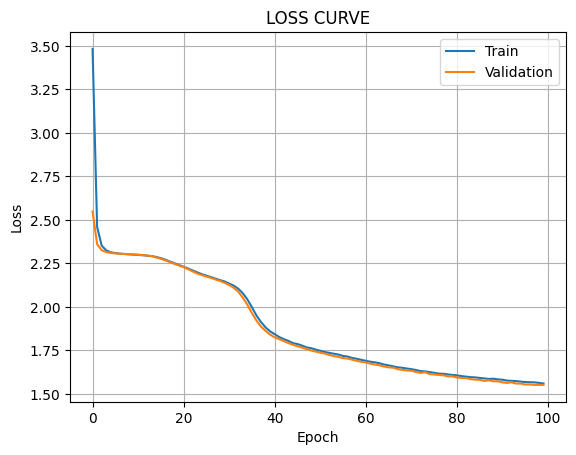

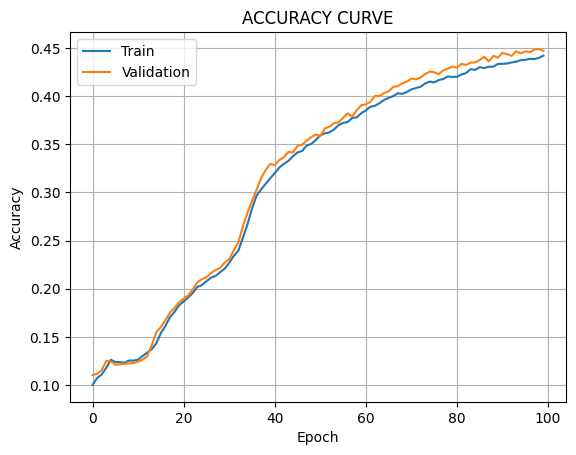

313/313 [==============================] - 3s 10ms/step
auc_roc225_100L  0.8540017666666667


In [22]:
model225_100L = Sequential()
model225_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100L.add(Activation("relu"))
model225_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100L.add(Activation("relu"))
model225_100L.add(MaxPool2D(pool_size=(2,2)))
model225_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100L.add(Activation("relu"))
model225_100L.add(Dropout(0.1))
model225_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model225_100L.add(Activation("relu"))
model225_100L.add(MaxPool2D(pool_size=(2,2)))



model225_100L.add(Flatten())
model225_100L.add(Dense(10, activation="softmax"))

model225_100L.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

model225_100L.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=225,
          validation_data=(x_test, ohe_y_test),
          epochs=100)
model225_100L.summary()

train_loss = model225_100L.history.history['loss']
val_loss = model225_100L.history.history['val_loss']
train_accuracy = model225_100L.history.history['accuracy']
validation_accuracy = model225_100L.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc225_100L = roc_auc_score(labels, model225_100L.predict(x_test), multi_class='ovr')
print('auc_roc225_100L ',auc_roc225_100L)

In [23]:
model100_100 = Sequential()
model100_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100.add(Activation("relu"))
model100_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100.add(Activation("relu"))
model100_100.add(MaxPool2D(pool_size=(2,2)))
model100_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100.add(Activation("relu"))
model100_100.add(Dropout(0.1))
model100_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100.add(Activation("relu"))
model100_100.add(MaxPool2D(pool_size=(2,2)))



model100_100.add(Flatten())
model100_100.add(Dense(10, activation="softmax"))

model100_100.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model100_100.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=100,
          validation_data=(x_test, ohe_y_test),
          epochs=100)
model100_100.summary()
train_loss = model100_100.history.history['loss']
val_loss = model100_100.history.history['val_loss']
train_accuracy = model100_100.history.history['accuracy']
validation_accuracy = model100_100.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc100_100 = roc_auc_score(labels, model100_100.predict(x_test), multi_class='ovr')
print('auc_roc100_100 -',auc_roc100_100)

Epoch 1/100
500/500 [==============================] - 40s 37ms/step - loss: 2.6746 - accuracy: 0.1015 - val_loss: 2.3039 - val_accuracy: 0.1018
Epoch 2/100
500/500 [==============================] - 21s 42ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3034 - val_accuracy: 0.1012
Epoch 3/100
500/500 [==============================] - 23s 45ms/step - loss: 2.3025 - accuracy: 0.0981 - val_loss: 2.3035 - val_accuracy: 0.1013
Epoch 4/100
500/500 [==============================] - 24s 49ms/step - loss: 2.3015 - accuracy: 0.1001 - val_loss: 2.3033 - val_accuracy: 0.1018
Epoch 5/100
500/500 [==============================] - 25s 50ms/step - loss: 2.3007 - accuracy: 0.1022 - val_loss: 2.3018 - val_accuracy: 0.1046
Epoch 6/100
500/500 [==============================] - 20s 40ms/step - loss: 2.2985 - accuracy: 0.1054 - val_loss: 2.2985 - val_accuracy: 0.1108
Epoch 7/100
500/500 [==============================] - 20s 40ms/step - loss: 2.2760 - accuracy: 0.1323 - val_loss: 2.2046 - val_ac

500/500 [==============================] - 22s 44ms/step - loss: 1.4486 - accuracy: 0.4784 - val_loss: 1.4365 - val_accuracy: 0.4853
Epoch 58/100
500/500 [==============================] - 20s 40ms/step - loss: 1.4476 - accuracy: 0.4792 - val_loss: 1.4859 - val_accuracy: 0.4694
Epoch 59/100
500/500 [==============================] - 19s 38ms/step - loss: 1.4452 - accuracy: 0.4812 - val_loss: 1.4294 - val_accuracy: 0.4843
Epoch 60/100
500/500 [==============================] - 20s 40ms/step - loss: 1.4439 - accuracy: 0.4810 - val_loss: 1.4155 - val_accuracy: 0.4917
Epoch 61/100
500/500 [==============================] - 20s 39ms/step - loss: 1.4442 - accuracy: 0.4828 - val_loss: 1.4272 - val_accuracy: 0.4829
Epoch 62/100
500/500 [==============================] - 19s 39ms/step - loss: 1.4429 - accuracy: 0.4815 - val_loss: 1.4194 - val_accuracy: 0.4875
Epoch 63/100
500/500 [==============================] - 20s 41ms/step - loss: 1.4399 - accuracy: 0.4819 - val_loss: 1.4293 - val_accuracy

Epoch 1/100
500/500 [==============================] - 36s 38ms/step - loss: 53.3116 - accuracy: 0.0994 - val_loss: 34.6914 - val_accuracy: 0.0917
Epoch 2/100
500/500 [==============================] - 17s 34ms/step - loss: 35.8176 - accuracy: 0.0890 - val_loss: 26.9627 - val_accuracy: 0.0890
Epoch 3/100
500/500 [==============================] - 21s 43ms/step - loss: 28.5343 - accuracy: 0.0880 - val_loss: 22.3498 - val_accuracy: 0.0884
Epoch 4/100
500/500 [==============================] - 19s 39ms/step - loss: 23.5386 - accuracy: 0.0888 - val_loss: 18.7989 - val_accuracy: 0.0871
Epoch 5/100
500/500 [==============================] - 22s 45ms/step - loss: 19.5880 - accuracy: 0.0876 - val_loss: 15.8617 - val_accuracy: 0.0862
Epoch 6/100
500/500 [==============================] - 22s 44ms/step - loss: 16.0890 - accuracy: 0.0889 - val_loss: 12.9144 - val_accuracy: 0.0897
Epoch 7/100
500/500 [==============================] - 19s 38ms/step - loss: 12.6254 - accuracy: 0.0901 - val_loss: 10

500/500 [==============================] - 19s 38ms/step - loss: 2.3025 - accuracy: 0.1017 - val_loss: 2.3037 - val_accuracy: 0.1016
Epoch 58/100
500/500 [==============================] - 18s 36ms/step - loss: 2.3030 - accuracy: 0.1014 - val_loss: 2.3036 - val_accuracy: 0.1020
Epoch 59/100
500/500 [==============================] - 17s 35ms/step - loss: 2.3026 - accuracy: 0.1016 - val_loss: 2.3036 - val_accuracy: 0.1020
Epoch 60/100
500/500 [==============================] - 17s 34ms/step - loss: 2.3025 - accuracy: 0.1018 - val_loss: 2.3035 - val_accuracy: 0.1019
Epoch 61/100
500/500 [==============================] - 17s 35ms/step - loss: 2.3024 - accuracy: 0.1017 - val_loss: 2.3035 - val_accuracy: 0.1021
Epoch 62/100
500/500 [==============================] - 17s 35ms/step - loss: 2.3025 - accuracy: 0.1017 - val_loss: 2.3035 - val_accuracy: 0.1020
Epoch 63/100
500/500 [==============================] - 17s 34ms/step - loss: 2.3024 - accuracy: 0.1019 - val_loss: 2.3035 - val_accuracy

Total params: 1096 (4.28 KB)
Trainable params: 1096 (4.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


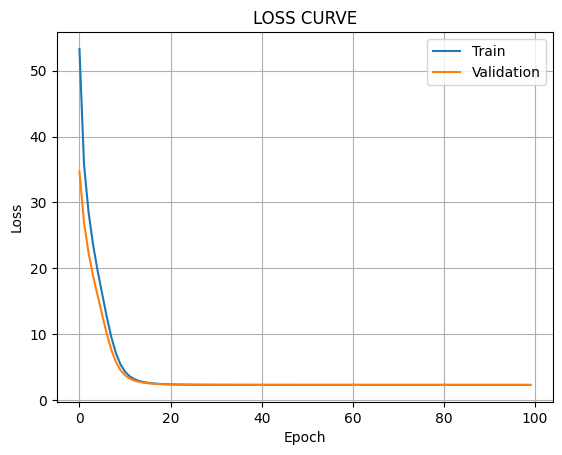

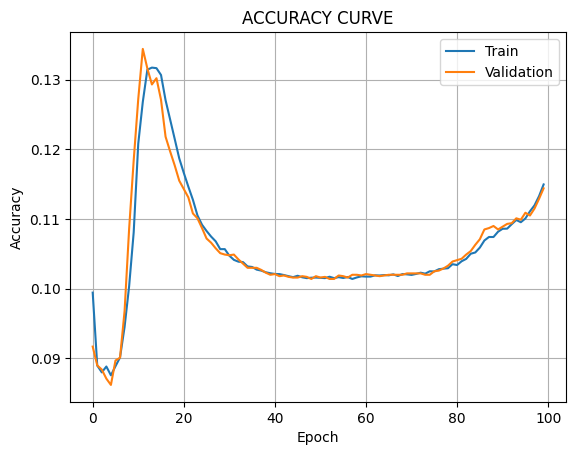

313/313 [==============================] - 4s 12ms/step
auc_roc100_100L - 0.5163116888888889


In [25]:
model100_100L = Sequential()
model100_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100.add(Activation("relu"))
model100_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100.add(Activation("relu"))
model100_100L.add(MaxPool2D(pool_size=(2,2)))
model100_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100L.add(Activation("relu"))
model100_100L.add(Dropout(0.1))
model100_100L.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model100_100L.add(Activation("relu"))
model100_100L.add(MaxPool2D(pool_size=(2,2)))



model100_100L.add(Flatten())
model100_100L.add(Dense(10, activation="softmax"))

model100_100L.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.00001), metrics=["accuracy"])

model100_100L.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=100,
          validation_data=(x_test, ohe_y_test),
          epochs=100)
model100_100L.summary()
train_loss = model100_100L.history.history['loss']
val_loss = model100_100L.history.history['val_loss']
train_accuracy = model100_100L.history.history['accuracy']
validation_accuracy = model100_100L.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc100_100L = roc_auc_score(labels, model100_100L.predict(x_test), multi_class='ovr')
print('auc_roc100_100L -',auc_roc100_100L)

In [26]:
model60_100 = Sequential()
model60_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model60_100.add(Activation("relu"))
model60_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model60_100.add(Activation("relu"))
model60_100.add(MaxPool2D(pool_size=(2,2)))
model60_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model60_100.add(Activation("relu"))
model60_100.add(Dropout(0.1))
model60_100.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model60_100.add(Activation("relu"))
model60_100.add(MaxPool2D(pool_size=(2,2)))



model60_100.add(Flatten())
model60_100.add(Dense(10, activation="softmax"))

model60_100.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=["accuracy"])

model60_100.fit(x=x_train, 
          y=ohe_y_train, 
          batch_size=60,
          validation_data=(x_test, ohe_y_test),
          epochs=100)
model60_100.summary()
train_loss = model60_100.history.history['loss']
val_loss = model60_100.history.history['val_loss']
train_accuracy = model60_100.history.history['accuracy']
validation_accuracy = model60_100.history.history['val_accuracy']

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
labels=y_test
auc_roc60_100 = roc_auc_score(labels, model60_100.predict(x_test), multi_class='ovr')
print('auc_roc60_100 -',auc_roc60_100)

Epoch 1/100
834/834 [==============================] - 28s 25ms/step - loss: 2.9494 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 2/100
834/834 [==============================] - 27s 32ms/step - loss: 2.3030 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 3/100
834/834 [==============================] - 28s 33ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
834/834 [==============================] - 28s 34ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/100
834/834 [==============================] - 28s 34ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 6/100
834/834 [==============================] - 28s 33ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
834/834 [==============================] - 28s 34ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_ac


KeyboardInterrupt



# c. Track the following metrics on Train and Validation sets
i. Loss

ii. Accuracy

iii. AUC

iv. Time taken to tune

In [ ]:
print('auc_roc1000_50  ',auc_roc1000_50)
print('auc_roc500_75  ',auc_roc500_75)
print('auc_roc500_70  ',auc_roc500_70)
print('auc_roc500_50  ',auc_roc500_50)
print('auc_roc250_70  ',auc_roc250_70)
print('auc_roc225_100  ',auc_roc225_100)
print('auc_roc225_100L  ',auc_roc225_100L)
print('auc_roc100_100  ',auc_roc100_100)
print('auc_roc100_100L  ',auc_roc100_100L)
print('auc_roc60_100  ',auc_ro60_100)

In [ ]:
model_name=['model1000','model500_75','model500_70','model500_50','model250_70','model225_100','model225_100L','model100_100','model100_100L','model60_100']
Units=[1000,500,500,500,250,225,225,100,100,60]
epoch=[50,75,70,50,70,100,100,100,100,100]
Trainloss=[1.8889,1.5800 ,2.3006,2.1841, 1.4822, 1.4098,1.6102, 1.3862, 2.3027, 1.3700]
Val_loss=[1.9082, 1.6704, 2.3020, 2.1702,1.4980  ,1.4197,1.6013, 1.3995,2.3026, 1.4888]
Train_acc=[ 0.3154, 0.4353, 0.0987 ,0.2004, 0.4712,0.4966 ,0.4134,0.5067, 0.1001, 0.5098]
val_acc=[0.3058,0.3957, 0.1024, 0.2051,0.4670,0.4892, 0.4146,0.5022,0.1000,0.4675]
AUC=[ 0.7730855277777777, 0.832840761111111, 0.5038728111111112, 0.6682879333333334, 0.8628377833333334,0.87861385,0.8446346333333334,0.8836664611111111,0.4999444444444444,0.8751769388888888]
potimizer=['Adam','Adam','Adam','Adam','Adam','Adam','Adam','Adam','Adam','Adam']
learning_rate=[0,0,0,0,0,0,0.0001,0,0.00001,0]
timeperiod=[' 8s 157ms/step', ' 8s 78ms/ste',  ' 17s 173ms/step','17s 170ms/step', '16s 79ms/step',' 20s 88ms/step','16s 71ms/step','21s 42ms/step','22s 45ms/step','27s 33ms/ste']
AUC_ROC=({'auc_roc1000_50':auc_roc1000_50,'auc_roc500_75':auc_roc500_75,'auc_roc500_70':auc_roc500_70,'auc_roc500_50':auc_roc500_50,
        'auc_roc250_70':auc_roc250_70,'auc_roc225_100':auc_roc225_100,'auc_roc225_100L':auc_roc225_100L,'auc_roc100_100':auc_roc100_100,
        'auc_roc100_100L':auc_roc100_100L,'auc_roc60_100':auc_roc60_100})
result=({'model_name':model_name,'Area_under_curvature':AUC,'potimizer':potimizer,'learning_rate':learning_rate,'Units':Units,'epoch':epoch,'Trainloss':Trainloss,'Val_loss':Val_loss,
        'Train_acc':Train_acc,'val_acc':val_acc,'timeperiod':timeperiod})
result
Result=pd.DataFrame.from_dict(result)
import seaborn as sns
plt.figure(figsize=(15,5))
ax=sns.barplot(data=Result,x='model_name',y='val_acc',hue='epoch')
plt.legend()
for i in ax.containers:
    ax.bar_label(i,)
print(Result)

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=Result,x='model_name',y='Train_acc',hue='epoch')
plt.legend()
for i in ax.containers:
    ax.bar_label(i,)
print(Result)

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=Result,x='model_name',y='Trainloss',hue='epoch')
plt.legend()
for i in ax.containers:
    ax.bar_label(i,)
print(Result)

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=Result,x='model_name',y='Val_loss',hue='epoch')
plt.legend()
for i in ax.containers:
    ax.bar_label(i,)
print(Result)

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=Result,x='model_name',y='Area_under_curvature',hue='epoch')
plt.legend()
for i in ax.containers:
    ax.bar_label(i,)
print(Result)

# We have explored few no.of  different CNN models by Tuning the models hyperparameters

model1000_50:

    313/313 [==============================] - 4s 7ms/step

    auc_roc1000_50   0.7730855277777777

    Epoch 50/50

    50/50 [==============================] - 8s 157ms/step - loss: 1.8889 - accuracy: 0.3154 - val_loss: 1.9082 - val_accuracy: 0.3058

model500_75:

    313/313 [==============================] - 2s 7ms/step

    auc_roc500_75   0.832840761111111

    Epoch 75/75

    100/100 [==============================] - 8s 78ms/step - loss: 1.5800 - accuracy: 0.4353 - val_loss: 1.6704 - val_accuracy: 0.3957

model500_70:

    313/313 [==============================] - 4s 11ms/step

    auc_roc500_70   0.5038728111111112

    Epoch 70/70

    100/100 [==============================] - 17s 173ms/step - loss: 2.3006 - accuracy: 0.0987 - val_loss: 2.3020 - val_accuracy: 0.1024

                
model500_50:
    313/313 [==============================] - 4s 11ms/step

    auc_roc500_50 0.6682879333333334
    Epoch 50/50

    100/100 [==============================] - 17s 170ms/step - loss: 2.1841 - accuracy: 0.2004 - val_loss: 2.1702 - val_accuracy: 0.2051

model250_70:

    313/313 [==============================] - 3s 10ms/step

    auc_roc250_70 0.8628377833333334

    Epoch 70/70

    200/200 [==============================] - 16s 79ms/step - loss: 1.4822 - accuracy: 0.4712 - val_loss: 1.4980 - val_accuracy: 0.4670

model225_100:

    313/313 [==============================] - 3s 11ms/step

    auc_roc225_100  0.87861385

    Epoch 100/100

    223/223 [==============================] - 20s 88ms/step - loss: 1.4098 - accuracy: 0.4966 - val_loss: 1.4197 - val_accuracy: 0.4892

model225_100L:

    313/313 [==============================] - 3s 10ms/step

    auc_roc225_100L  0.8446346333333334

    Epoch 100/100

    223/223 [==============================] - 16s 71ms/step - loss: 1.6102 - accuracy: 0.4134 - val_loss: 1.6013 - val_accuracy: 0.4146
    
model100_100:

    313/313 [==============================] - 4s 9ms/step

    auc_roc100_100 - 0.8836664611111111 

    Epoch 100/100

    500/500 [==============================] - 21s 42ms/step - loss: 1.3862 - accuracy: 0.5067 - val_loss: 1.3995 - val_accuracy: 0.5022

model100_100L:               

    auc_roc100_100L - 0.4999444444444444

    Epoch 100/100

    500/500 [==============================] - 22s 45ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000

model60_100:

    313/313 [==============================] - 5s 11ms/step

    auc_roc60_100 - 0.8751769388888888

    Epoch 100/100

    834/834 [==============================] - 27s 33ms/step - loss: 1.3700 - accuracy: 0.5098 - val_loss: 1.4888 - val_accuracy: 0.4675
---------------------------------------


In [ ]:
print(Result)
Result['Train_acc'].plot(kind='bar')

In [ ]:
Result['val_acc'].plot(kind='bar')

# Conclusion
     Model   model225_100   has peformed better than all othe mode. because of less loss in train and validation dataset 
      and thre less diference between the accuracy of train and validation dataset predictions.
     Epoch 100/100223/223 [==============================] 
     - 20s 88ms/step - loss: 1.4098 - accuracy: 0.4966 - val_loss: 1.4197 - val_accuracy: 0.4892
      there is no Improvement in the performance of the model when we add the learning rate to the  Adam Optimizer.

By training the model for more epochs the best results can be obtained.

# Pridictions:

# Using a Pretrained Model

a. Load a pretrained model like VGG16 or Resnet50

b. Finetune the last 2/3 layers using a small part of the CIFAR10 dataset (20 percentage or so)

c. Track the following metrics on Train and Validation sets

 i. Loss
 ii. Accuracy
 iii. AUC
 iv. Time taken to tune

In [43]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
import glob
import time
from keras.preprocessing.image import load_img
import numpy as np

import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.preprocessing import image
from PIL import Image

In [44]:
(x_train,y_train),(x_test,y_test)=load_data()
load_data
Classes_number=10

In [45]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes=pd.DataFrame(classes)
classes-classes.T[[1]]
classes.columns=['class']
classes

class
0    airplane
1  automobile
2        bird
3         cat
4        deer
5         dog
6        frog
7       horse
8        ship
9       truck

In [46]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
uint8
uint8


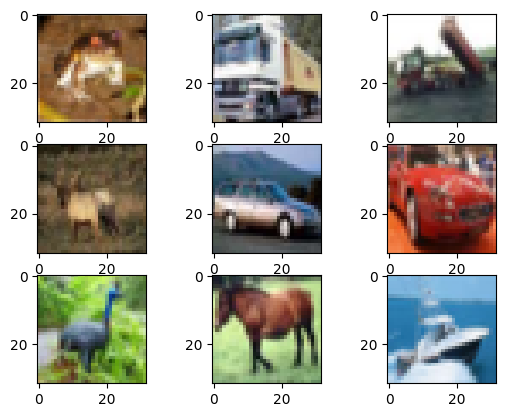

In [48]:
# plot first few images
for i in range(9):
 # define subplot
  plt.subplot(330 + 1 + i)
 # plot raw pixel data
  plt.imshow(x_train[i])
# show the figure
plt.show()

In [49]:
ohe_y_train=to_categorical(y_train)
ohe_y_test=to_categorical(y_test)
print(ohe_y_train.shape)
print(ohe_y_test.shape)

(50000, 10)
(10000, 10)


In [50]:
x_train=x_train.astype('float')
x_test=x_test.astype('float')
print('x_train.dtype  -  ',x_train.dtype)
print('x_test.dtype   -   ',x_test.dtype)

x_train.dtype  -   float64
x_test.dtype   -    float64


# Preprocessing: Normalize pixel values

In [51]:
# convert from integers to floats
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

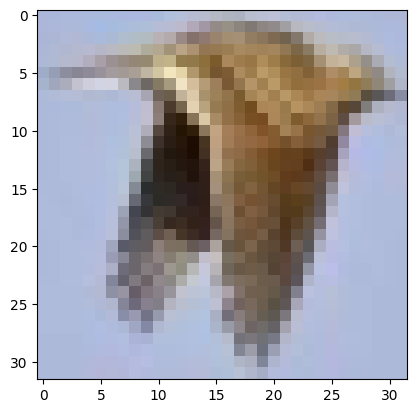

In [52]:
plt.imshow(x_train[123].astype(int))
plt.show()

In [53]:
pretrained_model = VGG16()

In [ ]:
pretrained_model.summary()

baseline_model = Sequential()

In [54]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

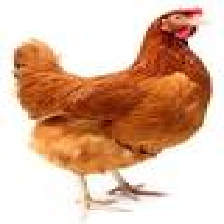

In [55]:
image1=tf.keras.utils.load_img(
    path=r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\Artifitial_Itelli_DNN\CNN\10 June\download_hen.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(224,224),
    interpolation='nearest',
    keep_aspect_ratio=False
)
image1

In [56]:
image1=np.array(image1)
print(image1.shape)
image1=preprocess_input(image1)
image1R=image1.reshape(1,224,224,3)
print(image1R.shape)

preds=pretrained_model.predict(image1R)
print(preds.shape)

(224, 224, 3)
(1, 224, 224, 3)



KeyboardInterrupt



# Finetuning the model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
import glob

import tensorflow.compat.v2 as tf
tf.keras.preprocessing.image.load_img
from keras.preprocessing import image
import keras.utils as image
from tensorflow.keras.preprocessing import image

In [58]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [59]:
# Sample 20% of the training data for fine-tuning
sample_size = int(0.2 * len(x_train))
sample_indices = np.random.choice(len(x_train), size=sample_size, replace=False)
x_train_sample = x_train[sample_indices]
y_train_sample = y_train[sample_indices]

In [60]:
# Load pretrained VGG16 model with weights from ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [62]:
# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)


In [63]:
# Create the fine-tuned model
model3L = Model(inputs=base_model.input, outputs=predictions)


In [64]:
# Freeze layers except the last 2/3 layers for fine-tuning
for layer in model3L.layers[:-3]:
    layer.trainable = False

In [65]:
# Compile the model
model3L.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
# Train the model and track metrics and time
start_time = time.time()
history = model3L.fit(x_train_sample, y_train_sample,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test, y_test))
end_time = time.time()

Epoch 1/10
313/313 [==============================] - 81s 259ms/step - loss: 1.2825 - accuracy: 0.5465 - val_loss: 1.3414 - val_accuracy: 0.5322
Epoch 2/10
313/313 [==============================] - 84s 270ms/step - loss: 1.1900 - accuracy: 0.5815 - val_loss: 1.3255 - val_accuracy: 0.5397
Epoch 3/10
313/313 [==============================] - 84s 270ms/step - loss: 1.1134 - accuracy: 0.6107 - val_loss: 1.2461 - val_accuracy: 0.5638
Epoch 4/10
313/313 [==============================] - 86s 274ms/step - loss: 1.0541 - accuracy: 0.6306 - val_loss: 1.2611 - val_accuracy: 0.5591
Epoch 5/10
313/313 [==============================] - 82s 263ms/step - loss: 0.9940 - accuracy: 0.6536 - val_loss: 1.2874 - val_accuracy: 0.5628
Epoch 6/10
313/313 [==============================] - 82s 263ms/step - loss: 0.9412 - accuracy: 0.6725 - val_loss: 1.2504 - val_accuracy: 0.5697
Epoch 7/10
313/313 [==============================] - 82s 262ms/step - loss: 0.8901 - accuracy: 0.6872 - val_loss: 1.2690 - val_ac

In [69]:
# Evaluate the model
loss, accuracy = model3L.evaluate(x_test, y_test, verbose=2)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 - 42s - loss: 1.3527 - accuracy: 0.5564 - 42s/epoch - 134ms/step
Test loss: 1.3526744842529297
Test accuracy: 0.5564000010490417


In [70]:
# Calculate AUC for validation set
y_pred = model3L.predict(x_test)
auc_scores3L = [roc_auc_score(y_test[:, i], y_pred[:, i]) for i in range(10)]
auc_scores3L

313/313 [==============================] - 42s 128ms/step


[0.9384425555555554,
 0.9365724444444444,
 0.8631077777777777,
 0.8357092222222221,
 0.8874711111111109,
 0.8850566666666668,
 0.9377128888888889,
 0.921425111111111,
 0.9479143333333333,
 0.9267526666666667]

In [72]:
# Print metrics and time taken
print("Metrics on Train and Validation sets:")
print("Loss:", history.history['loss'][-1])
print("Accuracy:", history.history['accuracy'][-1])
print("AUC Scores:", auc_scores3L)
print("Time taken:", end_time - start_time, "seconds")

Metrics on Train and Validation sets:
Loss: 0.7331026196479797
Accuracy: 0.7526000142097473
AUC Scores: [0.9384425555555554, 0.9365724444444444, 0.8631077777777777, 0.8357092222222221, 0.8874711111111109, 0.8850566666666668, 0.9377128888888889, 0.921425111111111, 0.9479143333333333, 0.9267526666666667]
Time taken: 827.6108238697052 seconds


In [73]:

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
# Create the fine-tuned model
model2L = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers except the last 2/3 layers for fine-tuning
for layer in model2L.layers[:-2]:
    layer.trainable = False
    
# Compile the model
model2L.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and track metrics and time
start_time = time.time()
history = model2L.fit(x_train_sample, y_train_sample,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test, y_test))
end_time = time.time()

# Evaluate the model
loss, accuracy = model2L.evaluate(x_test, y_test, verbose=2)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Calculate AUC for validation set
y_pred = model2L.predict(x_test)
auc_scores2L = [roc_auc_score(y_test[:, i], y_pred[:, i]) for i in range(10)]
auc_scores2L

# Print metrics and time taken
print("Metrics on Train and Validation sets:")
print("Loss:", history.history['loss'][-1])
print("Accuracy:", history.history['accuracy'][-1])
print("AUC Scores:", auc_scores2L)
print("Time taken:", end_time - start_time, "seconds")

Epoch 1/10
313/313 [==============================] - 92s 280ms/step - loss: 1.5528 - accuracy: 0.4527 - val_loss: 1.3791 - val_accuracy: 0.5181
Epoch 2/10
313/313 [==============================] - 92s 296ms/step - loss: 1.2724 - accuracy: 0.5533 - val_loss: 1.3364 - val_accuracy: 0.5337
Epoch 3/10
313/313 [==============================] - 92s 295ms/step - loss: 1.1796 - accuracy: 0.5930 - val_loss: 1.2839 - val_accuracy: 0.5530
Epoch 4/10
313/313 [==============================] - 91s 290ms/step - loss: 1.1047 - accuracy: 0.6114 - val_loss: 1.2906 - val_accuracy: 0.5516
Epoch 5/10
313/313 [==============================] - 91s 292ms/step - loss: 1.0421 - accuracy: 0.6388 - val_loss: 1.2415 - val_accuracy: 0.5642
Epoch 6/10
313/313 [==============================] - 92s 295ms/step - loss: 0.9837 - accuracy: 0.6548 - val_loss: 1.2778 - val_accuracy: 0.5536
Epoch 7/10
313/313 [==============================] - 90s 289ms/step - loss: 0.9300 - accuracy: 0.6759 - val_loss: 1.2669 - val_ac

In this example, the VGG16 model is pretrained on ImageNet and then fine-tuned using a small subset of the CIFAR-10 dataset. The model's performance is evaluated on various metrics including loss, accuracy, AUC scores for each class, and the time taken for the fine-tuning process. Keep in mind that actual performance and results may vary depending on factors such as random sampling and training hyperparameters.

In this example, the pretrained VGG16 model is loaded and the top layers are replaced with custom layers for CIFAR-10 classification. The last 2/3 layers are fine-tuned while the rest of the layers are frozen. The model is trained on a 20% subset of the training data and the mentioned metrics are tracked. Please note that the actual performance might vary based on the random subset sampled and the number of epochs used for training.

In [74]:
image=load_data()
image
#image = image.T[[1]]    #transposing will deplay in  vetically
#image.columns = classes
image

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [75]:
len(classes)
classes

class
0    airplane
1  automobile
2        bird
3         cat
4        deer
5         dog
6        frog
7       horse
8        ship
9       truck

# Test Finetuned Model
    0-'airplane',
     1-'automobile',
     2-'bird',
     3-'cat',
     4-'deer',
     5-'dog',
     6-'frog',
     7-'horse',
     8-'ship',
     9-'truck'

In [76]:
img = r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\Artifitial_Itelli_DNN\CNN\plane2.jpeg'
image_for_classification = load_img(path = img ,target_size=(224,224))
image_for_classification = np.array(image_for_classification)
image_for_classification = preprocess_input(image_for_classification)
image_for_classification = image_for_classification.reshape(1, 224, 224, 3)
preds = model3L.predict(image_for_classification)
preds

1/1 [==============================] - 1s 519ms/step


array([[9.9623364e-01, 4.2324379e-31, 1.1942103e-16, 3.1446829e-15,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.7663295e-03, 3.4097191e-31]], dtype=float32)

In [77]:
preds.shape

(1, 10)

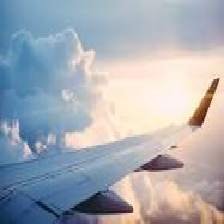

In [78]:
image_for_classification = tf.keras.utils.load_img(path = r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\Artifitial_Itelli_DNN\CNN\plane2.jpeg',
                                    target_size=(224,224))
image_for_classification

In [79]:
image_for_classification = np.array(image_for_classification)
image_for_classification = preprocess_input(image_for_classification)
image_for_classification = image_for_classification.reshape(1, 224, 224, 3)
print(image_for_classification.shape)


(1, 224, 224, 3)


In [83]:
preds = model2L.predict(image_for_classification)
preds.shape

1/1 [==============================] - 1s 567ms/step


(1, 10)

# Generate Predictions - using the pretrained model

In [84]:
from tensorflow import keras
#from keras.preprocessing import load_img, save_img, img_to_array

from keras.preprocessing import image
from keras.preprocessing.image import load_img

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import AUC
import glob
import numpy as np

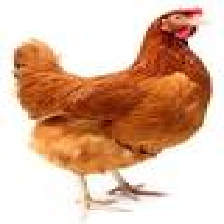

In [85]:
image1=tf.keras.utils.load_img(
    path=r'C:\Users\vijay\OneDrive\intellipaat course\pytho intelli\python\Artifitial_Itelli_DNN\CNN\10 June\download_hen.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(224,224),
    interpolation='nearest',
    keep_aspect_ratio=False
)
image1

In [86]:
image1=np.array(image1)
print(image1.shape)


(224, 224, 3)


In [87]:
image1=preprocess_input(image1)
image1.reshape(1,224,224,3)

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 121.32   ],
         [151.061  , 138.22101, 121.32   ],
         [151.061  , 138.22101, 121.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 121.32   ],
         [151.061  , 138.22101, 121.32   ],
         [151.061  , 138.22101, 121.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 123.32   ],
         [151.061  , 138.22101, 123.32   ],
         [151.061  , 138.22101, 123.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


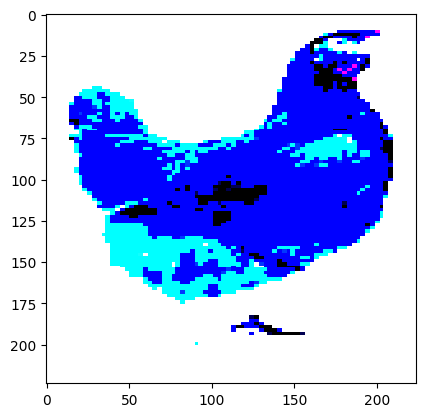

In [88]:
from matplotlib import pyplot as plt
plt.imshow(image1, interpolation='nearest')
plt.show()

In [91]:
image2=tf.keras.utils.load_img(
    path=r'C:\Users\vijay\Downloads\deer.jpeg',
    grayscale=False,
    color_mode='rgb',
    target_size=(1,224,224,3),
    interpolation='nearest',
    keep_aspect_ratio=False
)
image2
x = image.img_to_array(image2)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model3L.predict(x)
features

1/1 [==============================] - 0s 47ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [92]:
model = VGG16(weights='imagenet', include_top=False)


x = image.img_to_array(image1)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model2L.predict(x)
features

1/1 [==============================] - 0s 206ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.6721472e-10,
        0.0000000e+00, 2.0004225e-32, 0.0000000e+00, 0.0000000e+00,
        7.0579990e-32, 0.0000000e+00]], dtype=float32)

In [94]:
prediction = model2L.predict(image_for_classification)
prediction

1/1 [==============================] - 0s 237ms/step


array([[1.0000000e+00, 5.9746187e-32, 4.0984951e-26, 2.9214801e-22,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.9508246e-15, 1.8149514e-36]], dtype=float32)

# Compare the results

        a. Now compare the results and populate the following table

                Approach            Accuracy     AUC          Time Taken

    Custom CNN Model

    Pretrained Model

Document your understanding from the above results


# c. Track the following metrics on Train and Validation sets

        i. Loss
        ii. Accuracy
        iii. AUC
        iv. Time taken to tune
        

                        Approach             Accuracy             loss           AUC          Time Taken(seconds)
                                          Train      Val       Train   Val
 
    Custom CNN Model  1. model100_100:    0.5067   0.5022   1.386    1.3995      0.883666       21s 42ms/step
    
                      2. model225_100:    0.4966   0.4892   1.4098   1.4197      0.87861        20s 88ms/step     

    Pretrained Model     model3L           0.7526   0.5564   0.7331  1.3527      0.9384425       81s 260ms/step)
                         model2L           0.7338   0.5663   0.7676  1.3136      0.9481352      93s 296ms/step 

# model3L

Metrics on Train and Validation sets:

Loss: 0.7331026196479797

Accuracy: 0.7526000142097473

AUC Scores: [0.9384425555555554, 0.9365724444444444, 0.8631077777777777, 0.8357092222222221, 0.8874711111111109, 0.8850566666666668, 0.9377128888888889, 0.921425111111111, 0.9479143333333333, 0.9267526666666667]

Time taken: 827.6108238697052 seconds

# model2L:

Metrics on Train and Validation sets:

Loss: 0.7676346898078918

Accuracy: 0.7337999939918518

AUC Scores: [0.9384830000000001, 0.934145, 0.8684344444444444, 0.8374256666666667, 0.8930283333333333, 0.8895627777777777, 0.9369301111111111, 0.9223841111111112, 0.9481352222222224, 0.9222593333333332]

Time taken: 921.1566851139069 seconds

# Document your understanding from the above results:
    
     We Can Understand that pretrained VGG16 model are giving the petter Accuracy and preforming  Better than theThe Custom CNN Model.
        I am Making this Assumption Based on the comparison  Results Obtained By the models and Time Taken by the Models.
            Time taken:
                model100_100      -     21s 42ms/step
                model225_100      -     20s 88ms/step
                model3L           -     82s 60ms/step
                model2L           -     93s 296ms/step
                
            Accuracy(train):
                model100_100      -     0.5067
                model225_100      -     0.4966 
                model3L           -     0.7526
                model2L           -     0.7338
                
            Accuracy(Validation):
                model100_100      -     0.5022
                model225_100      -     0.4892 
                model3L           -     0.5564
                model2L           -     0.5663
                
            loss(train):
                model100_100      -     1.3862
                model225_100      -     1.4098 
                model3L           -     0.7331
                model2L           -     0.7676
                
            loss(Validation):
                model100_100      -     1.3995 
                model225_100      -     1.4197 
                model3L           -     1.827438
                model2L           -     1.3136
                
           AUC SCORE:
                model100_100      -     0.883666
                model225_100      -     0.87861 
                model3L           -     0.9384425
                model2L           -     0.9481352
                

     model_name  Trainloss  Validationloss  TrainAccuracy(%)  ValAccuracy(%)  \
0  model100_100     1.3860          1.3995             50.00           50.22   
1  model225_100     1.4098          1.4197             50.00           48.92   
2       model3L     0.7331          1.3527             75.26           55.64   
3       model2L     0.7676          1.3136             73.38           56.63   

   AU_Scores(%)  Time_taken(sec)  
0      88.36660               21  
1      87.86100               20  
2      93.84425               81  
3      94.81352               93  


Text(0, 0.5, 'Mdel Performance')

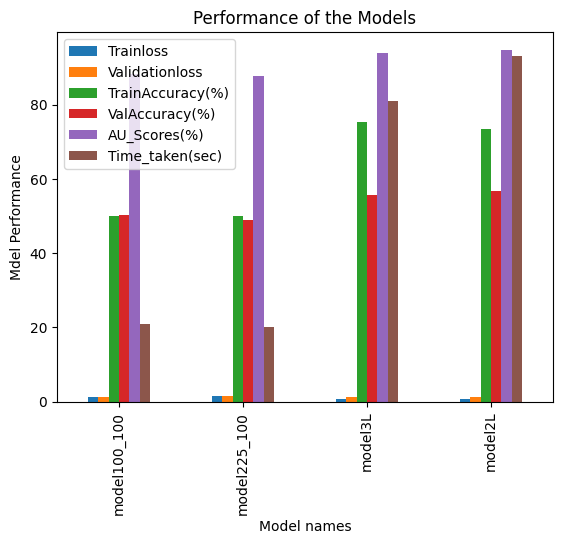

In [98]:
model_name=['model100_100','model225_100','model3L','model2L']
TLoss=[1.386,1.4098, 0.7331,0.7676]
VLoss=[1.3995 ,1.4197,  1.3527,1.3136]
TAccuracy=[50, 50, 75.26,73.38]
VAccuracy=[50.22, 48.92,55.64,56.63]
AU_Scores=[88.3666,87.861,93.84425,94.81352 ]
Time_taken=[21,20,81,93]
Performance_models={'model_name':model_name,'Trainloss':TLoss,'Validationloss':VLoss,
                    'TrainAccuracy(%)':TAccuracy,'ValAccuracy(%)':VAccuracy,'AU_Scores(%)':AU_Scores,'Time_taken(sec)':Time_taken}
Performance_models=pd.DataFrame.from_dict(Performance_models)
print(Performance_models)
Performance_models.set_index('model_name',inplace=True)
Performance_models.plot(kind='bar')
plt.title('Performance of the Models')
plt.xlabel('Model names')
plt.ylabel('Mdel Performance')


# Conclusion
CNN Models:
 In the CNN Models   model225_100   and model100_100 has peformed better than all other models. because of less loss in train and validation dataset  and greater accuracy than other models.
  and thre less diference between the accuracy of train and validation dataset predictions.
 Epoch 100/100223/223 [==============================] 
 - 20s 88ms/step - loss: 1.4098 - accuracy: 0.4966 - val_loss: 1.4197 - val_accuracy: 0.4892
 
  there is no Improvement in the performance of the model when we add the learning rate to the  Adam Optimizer.
By training the model for more epochs the best results can be obtained.

From Above Inference I Can Strongly Believe that the pre trained models were performing More better than CNN models.

# ------------------------------------------- Completed-----------------------------------------------